<br> Radley Ciego </br>
<br> GTECH 73100 </br>
<br> Assignment 8: Pandas & Geopandas </br>

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
data = "https://raw.githubusercontent.com/TangoYankee/gtech_731-geocomp-hw/main/assignment-eight/data/gz_2010_us_050_00_20m.geojson"
counties = gpd.read_file(data)
counties.head(10)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.41644 31.61947, -85.41743 31.314..."
6,0500000US01051,01,051,Elmore,County,618.485,"POLYGON ((-86.33678 32.76747, -86.31948 32.753..."
7,0500000US01065,01,065,Hale,County,643.943,"POLYGON ((-87.42120 32.87451, -87.47217 32.830..."
8,0500000US01079,01,079,Lawrence,County,690.678,"POLYGON ((-87.10507 34.68604, -87.10591 34.587..."
9,0500000US01083,01,083,Limestone,County,559.936,"POLYGON ((-86.83631 34.99176, -86.82066 34.991..."


In [3]:
counties.dtypes['STATE'] # check datatype of STATE column for join
counties['STATE'] = counties['STATE'].astype(int) # change data type to integer

In [4]:
states = pd.read_json('./fipsToState.json', orient='index') 
states = states.reset_index() # add index as column name
states.head(5)

,index,0
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [5]:
states = states.rename(columns={'index':'STATE',0:'STATE_NAME'}) # rename columns
states.dtypes['STATE'] # check datatype of STATE column for join

dtype('int64')

## Task 1:
Find top n most common county names (n = 3 or 5, for example)

In [6]:
def top_5_counties(n):
    return counties.groupby("NAME").size().nlargest(n)

In [7]:
top_5_counties(5)

NAME
Washington    31
Franklin      26
Jefferson     26
Jackson       24
Lincoln       24
dtype: int64

## Task 2:
Derive summary statistics for states, for example, number of counties, counties with max/min area

In [8]:
lrg_cnties = counties.groupby("NAME").max("CENSUSAREA")
lrg_cnties.tail(5)

,STATE,CENSUSAREA
NAME,,
Yukon-Koyukuk,2,145504.789
Yuma,8,5513.992
Zapata,48,998.412
Zavala,48,1297.406
Ziebach,46,1961.272


In [9]:
smll_cnties = counties.groupby("NAME").min("CENSUSAREA")
smll_cnties.head(5)

,STATE,CENSUSAREA
NAME,,
Abbeville,45,490.484
Acadia,22,655.119
Accomack,51,449.496
Ada,16,1052.576
Adair,19,405.283


## Task 3:
Join fips code to get full names of states (plesae do a real join using merge)

In [10]:
joined_states = counties.merge(states, on='STATE') # merge counties df with states df on state column
joined_states.sample(5)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,STATE_NAME
2065,0500000US40095,40,095,Marshall,County,371.080,"POLYGON ((-96.92211 33.95958, -96.93451 33.953...",Oklahoma
845,0500000US19041,19,041,Clay,County,567.238,"POLYGON ((-95.38808 43.25522, -94.91372 43.255...",Iowa
391,0500000US13277,13,277,Tift,County,258.915,"POLYGON ((-83.33873 31.47599, -83.43449 31.350...",Geogia
2121,0500000US38033,38,033,Golden Valley,County,1000.786,"POLYGON ((-104.04533 46.54093, -104.04527 46.6...",North Dakota
199,0500000US06013,6,013,Contra Costa,County,715.937,"POLYGON ((-121.91014 37.73046, -121.96077 37.7...",California


## Task 4:
Plot maps to show all the counties with the most common names from first task

<AxesSubplot: >

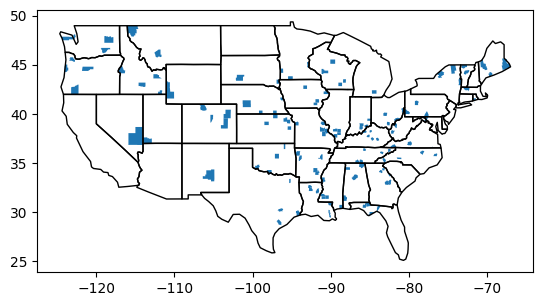

In [18]:
US = "./contiguous-us-with-states_1201.geojson"
US = gpd.read_file(US)

top_5 = counties.loc[counties['NAME'].isin(["Washington","Franklin","Jefferson","Jackson","Lincoln"])]

US = US.to_crs(top_5.crs)
ax = top_5.plot()
US.plot(ax=ax, facecolor="None")